In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# PG = Procter & Gamble Stock name
# ^GSPC = S&P 500 Index

assets = ['PG','^GSPC']
pf_data = pd.DataFrame()

for a in assets: 
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']


In [3]:
# Gets the most recent market value
pf_data.tail()

,PG,^GSPC
Date,,
2019-06-27,109.779999,2924.919922
2019-06-28,109.650002,2941.760010
2019-07-01,110.489998,2964.330078
2019-07-02,111.480003,2973.010010
2019-07-03,114.080002,2995.820068


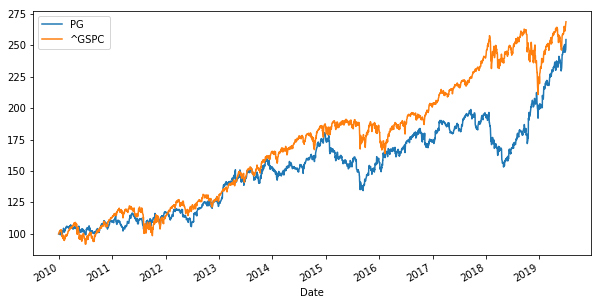

In [4]:
(pf_data / pf_data.iloc[0]*100).plot(figsize=(10,5))

In [5]:
log_returns = np.log(pf_data/pf_data.shift(1))

In [6]:
log_returns.mean()*250

PG       0.097671
^GSPC    0.103333
dtype: float64

In [7]:
log_returns.cov()*250

,PG,^GSPC
PG,0.021316,0.011449
^GSPC,0.011449,0.022046


In [8]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.528141
^GSPC,0.528141,1.000000


In [9]:
num_assets = len(assets)

In [10]:
num_assets

2

In [11]:
# np.random creates portofolio weights
arr = np.random.random(2)
arr

array([0.05866328, 0.1024384 ])

In [12]:
arr[0] + arr[1]

0.1611016811289443

In [13]:
weights = np.random.random(num_assets)
# Creates a loop that increments. w = w/sum()
weights /= np.sum(weights)
weights

array([0.6626154, 0.3373846])

In [14]:
weights[0] + weights[1]

1.0

### Expected Portfolio Return:

In [15]:
np.sum(weights*log_returns.mean())*250

0.0995812988207126

### Expected Portfolio Variance

In [16]:
np.dot(weights.T,np.dot(log_returns.cov()*250,weights))

0.016987450692901813

### Expected Portfolio Variance

In [17]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights)))

0.13033591482358886

### Expected Portfolio Volatility

In [18]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights)))

0.13033591482358886

In [19]:
# We will now simulate 1000 different combinations of the two portfolios
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        pfolio_returns.append(np.sum(weights*log_returns.mean())*250)
        pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250, weights))))
        
pfolio_returns, pfolio_volatilities

([0.10290718710576308,
  0.10058093404877089,
  0.10047688615607156,
  0.1025414016252509,
  0.100470636080586,
  0.09964609168257266,
  0.09934483855575672,
  0.09985714257375225,
  0.10042702136699434,
  0.09854106630797968,
  0.10035295049364146,
  0.09983138683904838,
  0.09835001763518807,
  0.10296863890361939,
  0.10040487565936178,
  0.10121622789702081,
  0.10080813298828721,
  0.09922742068833917,
  0.10027929350572354,
  0.101080492742578,
  0.10142356333620631,
  0.10147076682743503,
  0.09983744690031347,
  0.10131156708025325,
  0.09852604118277047,
  0.10020205042030639,
  0.10189814908034829,
  0.09838252704516906,
  0.09973765549301089,
  0.10261020043083524,
  0.1005494924741071,
  0.10161404477957188,
  0.10240209550370659,
  0.10118320384690295,
  0.10259445934166922,
  0.10047521966702286,
  0.10070685151069761,
  0.10002329924226869,
  0.09998761385043863,
  0.10270455039092238,
  0.10057837318998154,
  0.10121854641441264,
  0.10212002447787961,
  0.1021092686862

In [20]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights*log_returns.mean())*250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.09828948, 0.09808103, 0.1003919 , 0.10075801, 0.10153591,
        0.10304021, 0.10251049, 0.10145967, 0.10227308, 0.10116619,
        0.10180001, 0.10019713, 0.09922297, 0.10020619, 0.09956949,
        0.10077188, 0.09968007, 0.10116494, 0.10027664, 0.10022089,
        0.10061669, 0.10153364, 0.09997586, 0.10134826, 0.10040294,
        0.09877432, 0.099722  , 0.09808091, 0.09865922, 0.0997805 ,
        0.10089082, 0.0991278 , 0.10309329, 0.10071474, 0.10074085,
        0.09923735, 0.09848267, 0.1022374 , 0.09993711, 0.10253162,
        0.10250305, 0.09939322, 0.09953029, 0.10210034, 0.10019909,
        0.09938117, 0.10181331, 0.10103697, 0.10021331, 0.09973843,
        0.09992851, 0.10075214, 0.10184361, 0.09853513, 0.10329599,
        0.10203777, 0.10031073, 0.10014739, 0.09891251, 0.09988971,
        0.09795016, 0.09773114, 0.100896  , 0.10197941, 0.09996524,
        0.09859743, 0.10181884, 0.10300638, 0.0988273 , 0.09975421,
        0.10180046, 0.10029399, 0.10013859, 0.09

In [21]:
portfolios = pd.DataFrame({'Returns': pfolio_returns,'Volatility': pfolio_volatilities})

In [22]:
portfolios.head()

,Returns,Volatility
0,0.098289,0.139302
1,0.098081,0.141403
2,0.100392,0.128680
3,0.100758,0.128996
4,0.101536,0.131837


In [24]:
portfolios.tail()

,Returns,Volatility
995,0.100691,0.128888
996,0.098291,0.139291
997,0.103086,0.145466
998,0.100652,0.128836
999,0.101857,0.133839


Text(0,0.5,'Expected Return')

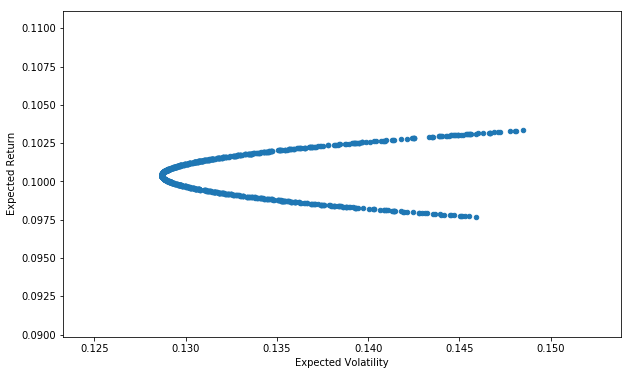

In [25]:
portfolios.plot(x='Volatility', y='Returns', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')